In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../data/humob/humob.csv")

In [3]:
# 1. Número de pings por user ID
pings_per_user = df.groupby('uid').size()

# 2. Número de celdas únicas visitadas por user ID
unique_cells_per_user = df.groupby('uid')[['x', 'y']].nunique()

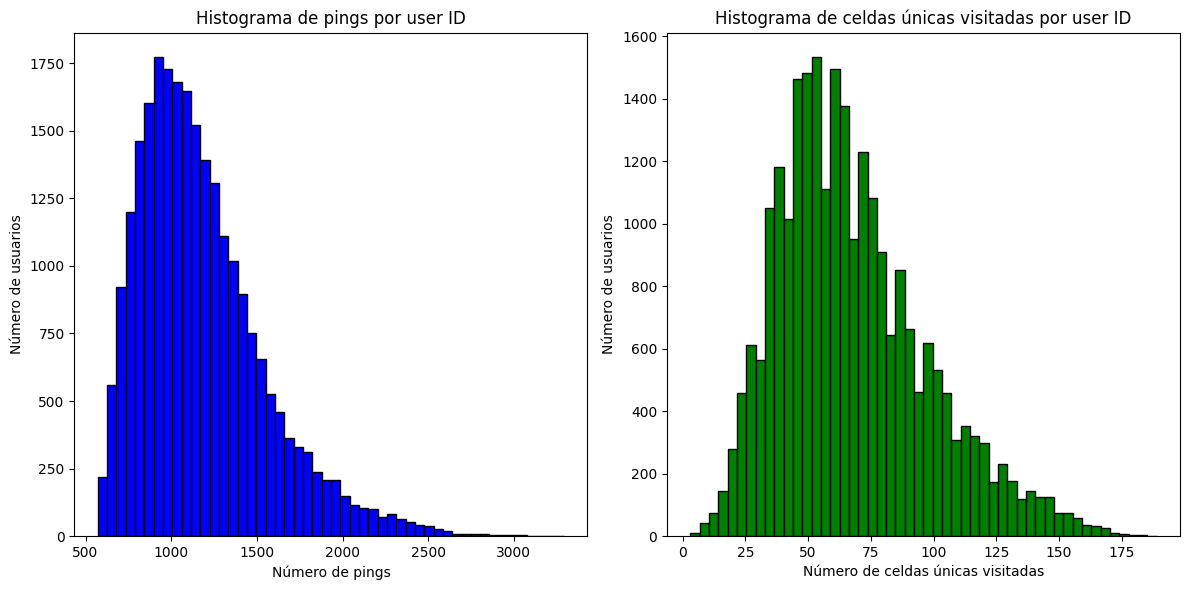

In [4]:
# Crear los histogramas
plt.figure(figsize=(12, 6))

# Histograma de pings por usuario
plt.subplot(1, 2, 1)
plt.hist(pings_per_user, bins=50, color='blue', edgecolor='black')
plt.xlabel('Número de pings')
plt.ylabel('Número de usuarios')
plt.title('Histograma de pings por user ID')

# Histograma de celdas únicas por usuario
plt.subplot(1, 2, 2)
plt.hist(unique_cells_per_user.max(axis=1), bins=50, color='green', edgecolor='black')
plt.xlabel('Número de celdas únicas visitadas')
plt.ylabel('Número de usuarios')
plt.title('Histograma de celdas únicas visitadas por user ID')

plt.tight_layout()
plt.show()

In [5]:
# 1. Número de pings por celda (x, y)
pings_per_cell = df.groupby(['x', 'y']).size()

# 2. Número de usuarios únicos por celda (x, y)
unique_users_per_cell = df.groupby(['x', 'y'])['uid'].nunique()

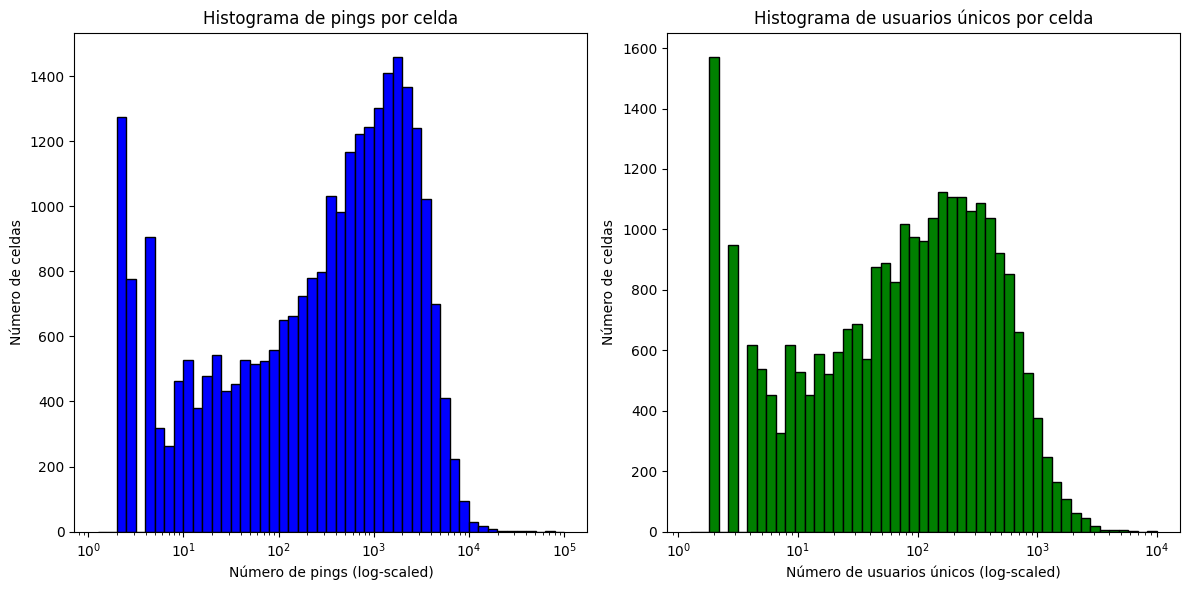

In [6]:
# Crear los histogramas con escala logarítmica
plt.figure(figsize=(12, 6))

# Histograma de pings por celda
plt.subplot(1, 2, 1)
plt.hist(pings_per_cell, bins=np.logspace(0.1, 5, 50), color='blue', edgecolor='black')  # Bins en escala log
plt.xscale('log')
plt.xlabel('Número de pings (log-scaled)')
plt.ylabel('Número de celdas')
plt.title('Histograma de pings por celda')

# Histograma de usuarios únicos por celda
plt.subplot(1, 2, 2)
plt.hist(unique_users_per_cell, bins=np.logspace(0.1, 4, 50), color='green', edgecolor='black')  # Bins en escala log
plt.xscale('log')
plt.xlabel('Número de usuarios únicos (log-scaled)')
plt.ylabel('Número de celdas')
plt.title('Histograma de usuarios únicos por celda')

plt.tight_layout()
plt.show()

In [7]:
# 1. Número de pings por día
pings_per_day = df.groupby('d').size()

# 2. Número de usuarios únicos por día
unique_users_per_day = df.groupby('d')['uid'].nunique()

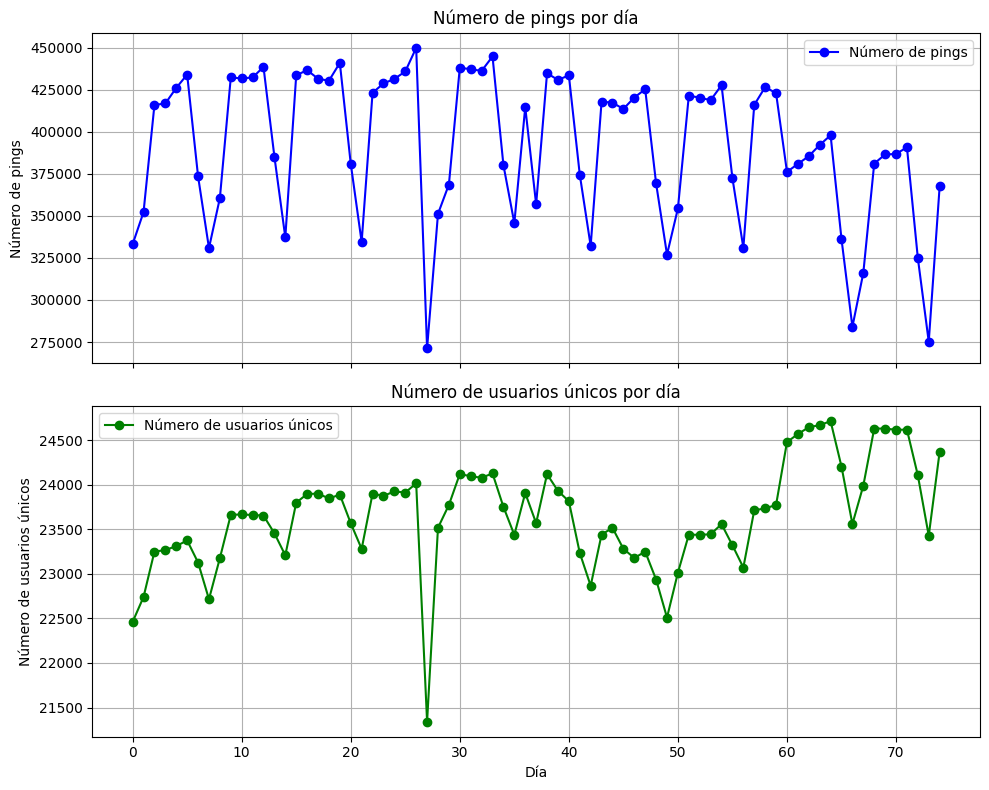

In [8]:
# Crear las gráficas temporales
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Gráfica 1: Número de pings por día
axes[0].plot(pings_per_day.index, pings_per_day.values, label='Número de pings', color='blue', marker='o')
axes[0].set_ylabel('Número de pings')
axes[0].set_title('Número de pings por día')
axes[0].legend()
axes[0].grid()

# Gráfica 2: Número de usuarios únicos por día
axes[1].plot(unique_users_per_day.index, unique_users_per_day.values, label='Número de usuarios únicos', color='green', marker='o')
axes[1].set_ylabel('Número de usuarios únicos')
axes[1].set_title('Número de usuarios únicos por día')
axes[1].legend()
axes[1].grid()

# Configuración general
plt.xlabel('Día')
plt.tight_layout()
plt.show()

In [9]:
# Agrupar por timeslot
pings_per_timeslot = df.groupby('t').size()
unique_users_per_timeslot = df.groupby('t')['uid'].nunique()

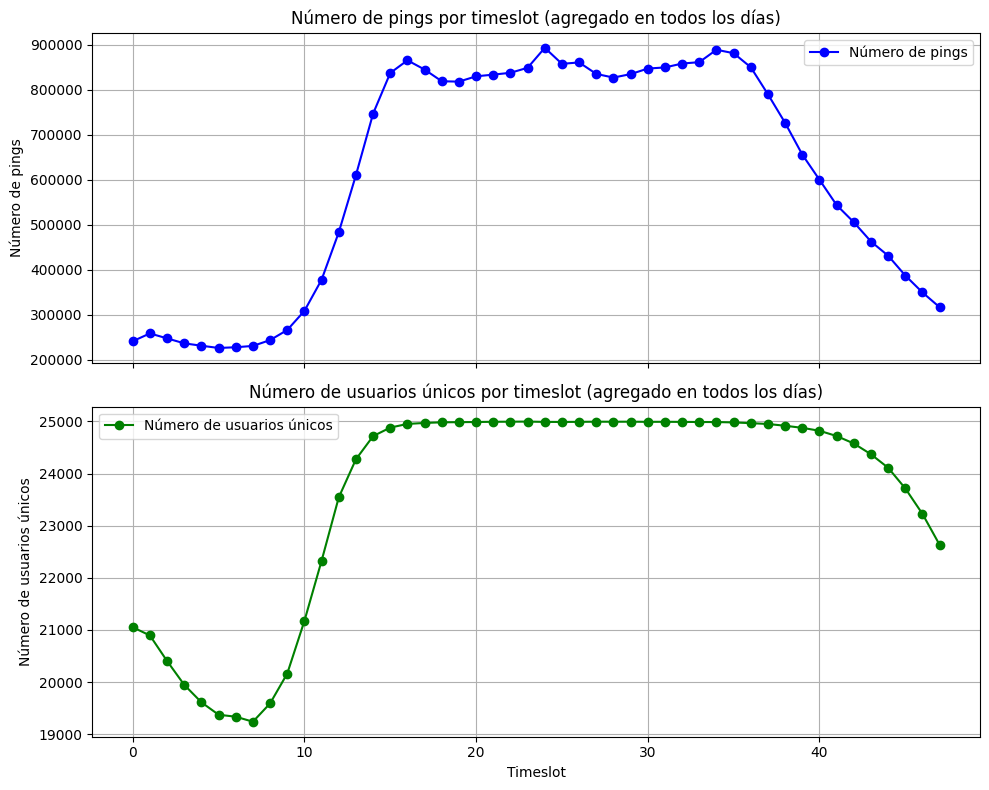

In [10]:
# Crear las gráficas
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Gráfica 1: Número de pings por timeslot
axes[0].plot(pings_per_timeslot.index, pings_per_timeslot.values, label='Número de pings', color='blue', marker='o')
axes[0].set_ylabel('Número de pings')
axes[0].set_title('Número de pings por timeslot (agregado en todos los días)')
axes[0].legend()
axes[0].grid()

# Gráfica 2: Número de usuarios únicos por timeslot
axes[1].plot(unique_users_per_timeslot.index, unique_users_per_timeslot.values, label='Número de usuarios únicos', color='green', marker='o')
axes[1].set_ylabel('Número de usuarios únicos')
axes[1].set_title('Número de usuarios únicos por timeslot (agregado en todos los días)')
axes[1].legend()
axes[1].grid()

# Configuración general
plt.xlabel('Timeslot')
plt.tight_layout()
plt.show()

In [35]:
# Agrupar por coordenadas (x, y) para contar el número total de pings en cada celda
pings_per_cell = df.groupby(['x', 'y']).size().reset_index(name='ping_count')
users_per_cell = df.groupby(['x', 'y'])['uid'].nunique().reset_index(name='user_count')

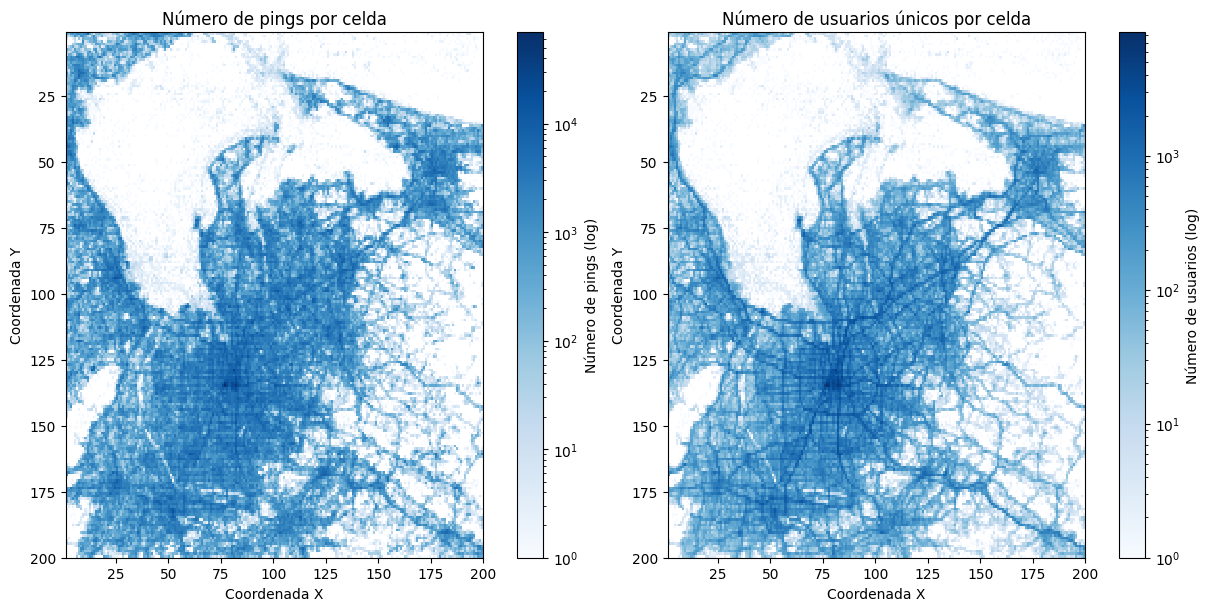

In [46]:
import matplotlib.colors as mcolors 

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Gráfico 1: Número de pings por celda
hist1 = axes[0].hist2d(
    x=pings_per_cell['y'],
    y=pings_per_cell['x'],
    weights=pings_per_cell['ping_count'],
    bins=[200, 200],
    norm=mcolors.LogNorm(),
    cmap=plt.cm.Blues
)
axes[0].invert_yaxis()  # Invertir el eje Y
axes[0].set_title('Número de pings por celda')
axes[0].set_xlabel('Coordenada X')
axes[0].set_ylabel('Coordenada Y')
fig.colorbar(hist1[3], ax=axes[0], label='Número de pings (log)')

# Gráfico 2: Número de usuarios únicos por celda
hist2 = axes[1].hist2d(
    x=users_per_cell['y'],
    y=users_per_cell['x'],
    weights=users_per_cell['user_count'],
    bins=[200, 200],
    norm=mcolors.LogNorm(),
    cmap=plt.cm.Blues
)
axes[1].invert_yaxis()  # Invertir el eje Y
axes[1].set_title('Número de usuarios únicos por celda')
axes[1].set_xlabel('Coordenada X')
axes[1].set_ylabel('Coordenada Y')
fig.colorbar(hist2[3], ax=axes[1], label='Número de usuarios (log)')

# Mostrar el gráfico
plt.show()

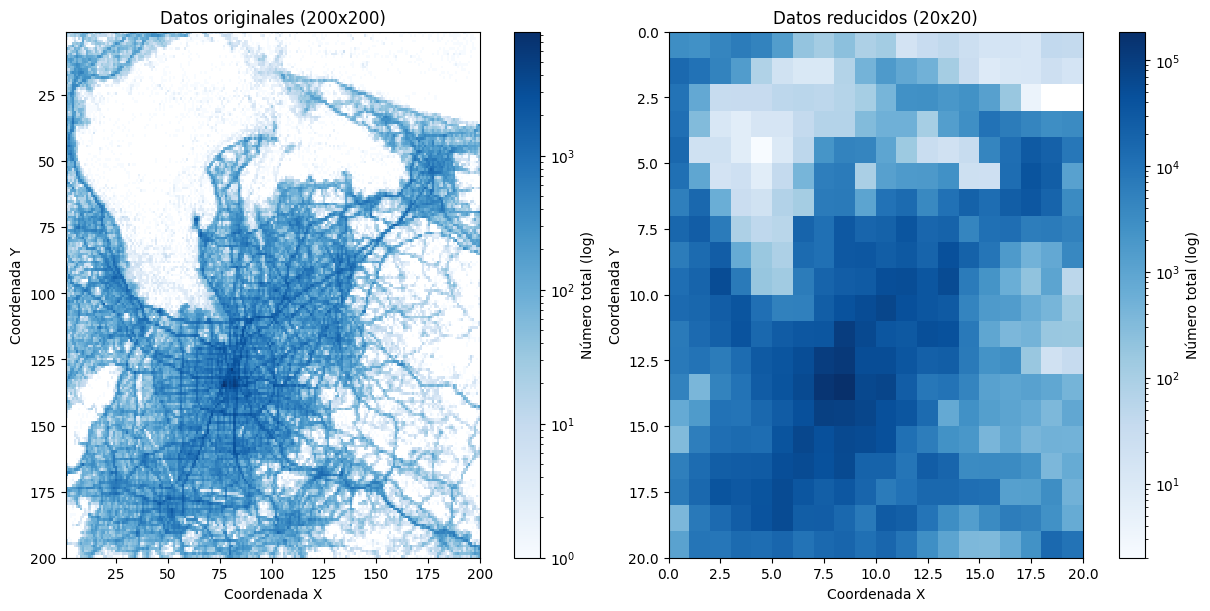

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Combinar los datos
data = pd.merge(pings_per_cell, users_per_cell, on=['x', 'y'], how='outer').fillna(0)

# Parámetros de reducción de resolución
original_bins = 200  # Resolución original (200x200)
new_bins = 20        # Resolución deseada (aproximadamente 3x reducción)
block_size = original_bins // new_bins  # Tamaño del bloque (agrupación)

# Crear nuevas coordenadas agrupadas
data['x_grouped'] = (data['x'] // block_size).astype(int)
data['y_grouped'] = (data['y'] // block_size).astype(int)

# Agrupar por las nuevas celdas y sumar los valores
downsampled_data = data.groupby(['x_grouped', 'y_grouped']).sum().reset_index()

# Visualizar los datos originales y reducidos
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Gráfico 1: Datos originales
hist1 = axes[0].hist2d(
    x=data['y'],
    y=data['x'],
    weights=data['user_count'],
    bins=[original_bins, original_bins],
    norm=mcolors.LogNorm(),
    cmap=plt.cm.Blues
)
axes[0].invert_yaxis()  # Invertir el eje Y
axes[0].set_title('Datos originales (200x200)')
axes[0].set_xlabel('Coordenada X')
axes[0].set_ylabel('Coordenada Y')
fig.colorbar(hist1[3], ax=axes[0], label='Número total (log)')

# Gráfico 2: Datos con resolución reducida
hist2 = axes[1].hist2d(
    x=downsampled_data['y_grouped'],
    y=downsampled_data['x_grouped'],
    weights=downsampled_data['user_count'],
    bins=[new_bins, new_bins],
    norm=mcolors.LogNorm(),
    cmap=plt.cm.Blues
)
axes[1].invert_yaxis()  # Invertir el eje Y
axes[1].set_title(f'Datos reducidos ({new_bins}x{new_bins})')
axes[1].set_xlabel('Coordenada X')
axes[1].set_ylabel('Coordenada Y')
fig.colorbar(hist2[3], ax=axes[1], label='Número total (log)')

plt.show()
